The dataset contains real estate sales records in NYC.
The following code performs an exploratory analysis on this dataset.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pathlib import Path

Obtain the data. An explanation for each data column can be found on the NYC website: https://www.nyc.gov/site/finance/taxes/

Put the data in the CleanDS class for data cleaning.

In [8]:

file_path = "Files\\"
dataset_name = "cleaned_nyc-rolling-sales.csv"
path = file_path + dataset_name
df_housing = pd.read_csv(path, header=0)
hue_order= ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
df_housing.head()
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0.4                    8482 non-null   int64 
 1   Unnamed: 0.3                    8482 non-null   int64 
 2   Unnamed: 0.2                    8482 non-null   int64 
 3   Unnamed: 0.1                    8482 non-null   int64 
 4   Unnamed: 0                      8482 non-null   int64 
 5   NEIGHBORHOOD                    8482 non-null   object
 6   BUILDING CLASS CATEGORY         8482 non-null   object
 7   TAX CLASS AT PRESENT            8482 non-null   object
 8   BLOCK                           8482 non-null   int64 
 9   BUILDING CLASS AT PRESENT       8482 non-null   object
 10  RESIDENTIAL UNITS               8482 non-null   int64 
 11  COMMERCIAL UNITS                8482 non-null   int64 
 12  TOTAL UNITS                     8482 non-null   

In [9]:
output_path = f'{file_path}/cleaned_nyc-rolling-sales.csv'
if os.path.exists(output_path):
    os.remove(output_path)
    
filepath = Path(output_path)
df_housing.to_csv(filepath)

<AxesSubplot:xlabel='BOROUGH_NAME', ylabel='Count'>

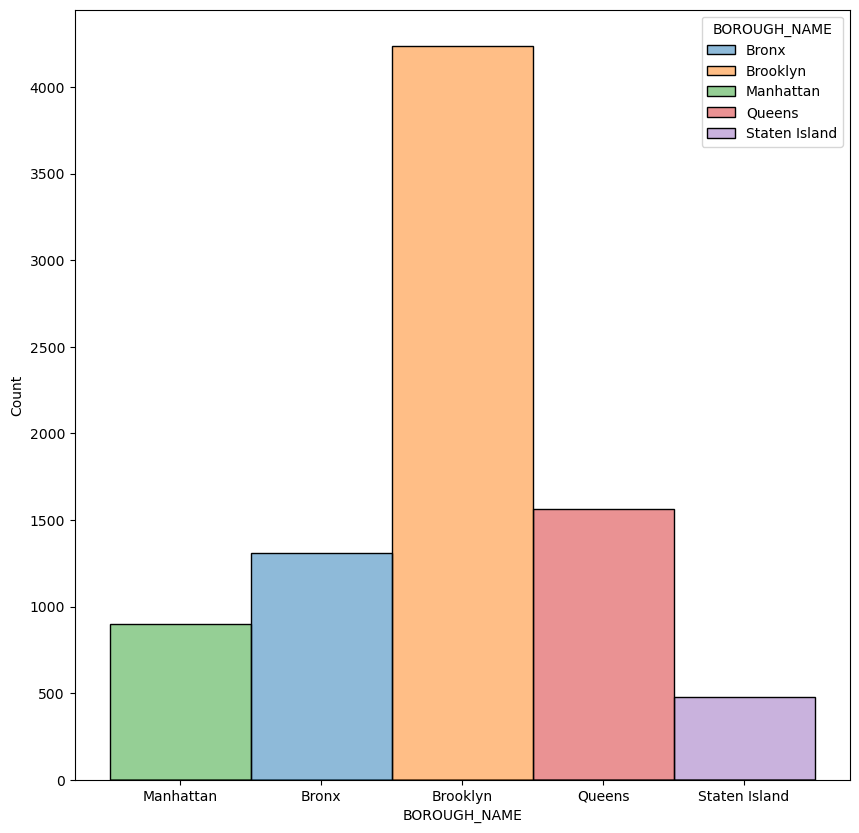

In [10]:
plt.figure(figsize = (10,10))
sns.histplot(data=df_housing, x="BOROUGH_NAME", hue="BOROUGH_NAME", hue_order=hue_order)

Now the data is ready for EDA. Some of the data is categorical and some of data is continuous.

Lets look at the age of the property and the sales price

<AxesSubplot:xlabel='AGE', ylabel='SALE PRICE'>

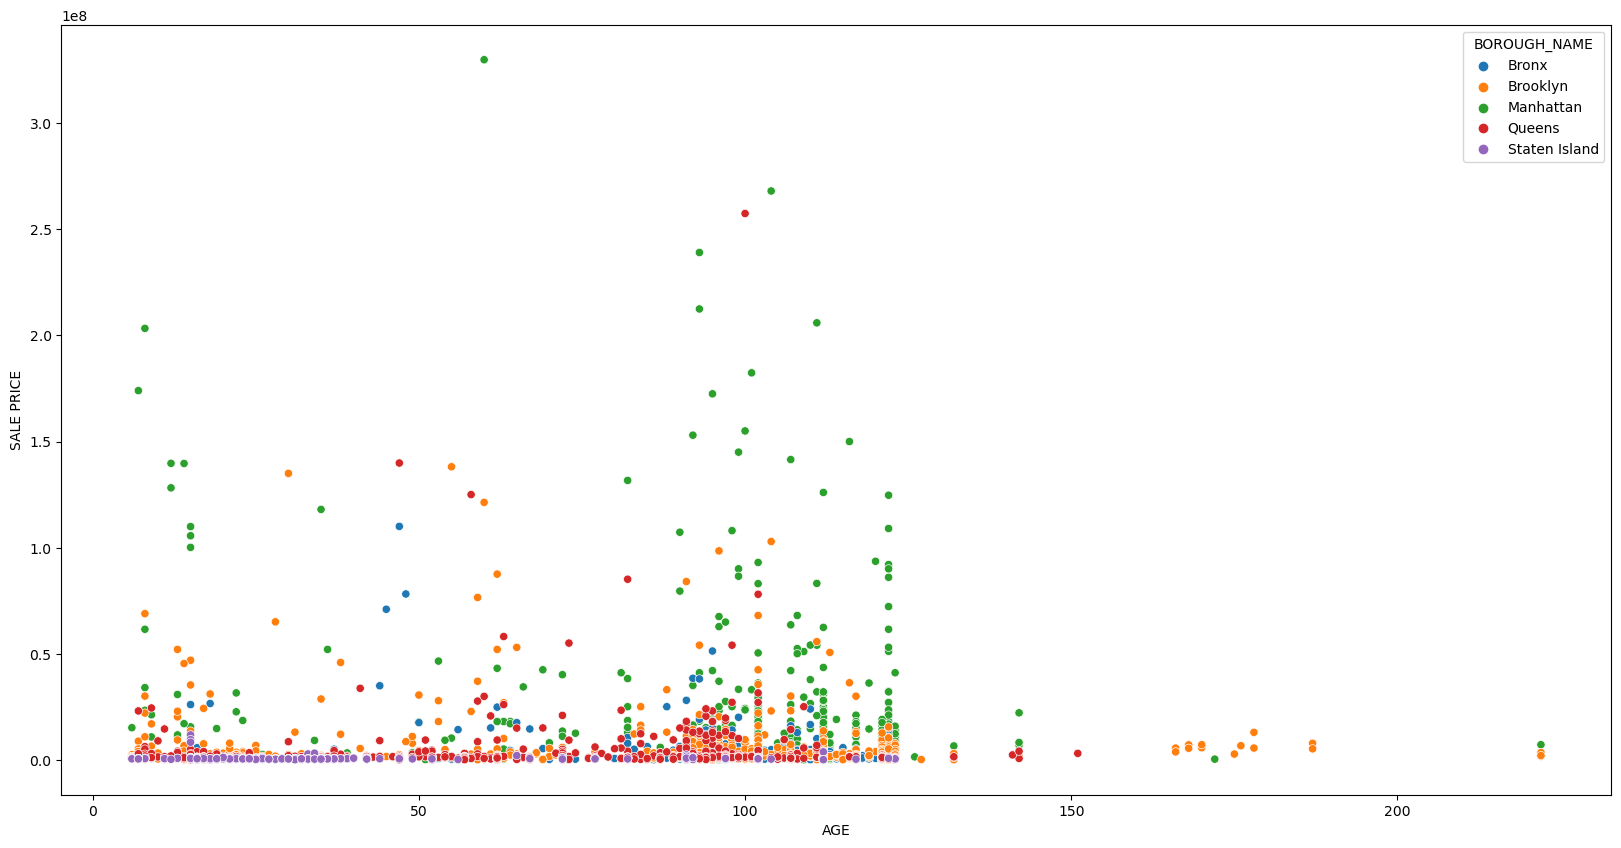

In [11]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=df_housing, x="AGE", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=hue_order)


Lets see the distribution of sales prices

<AxesSubplot:xlabel='SALE DATE', ylabel='SALE PRICE'>

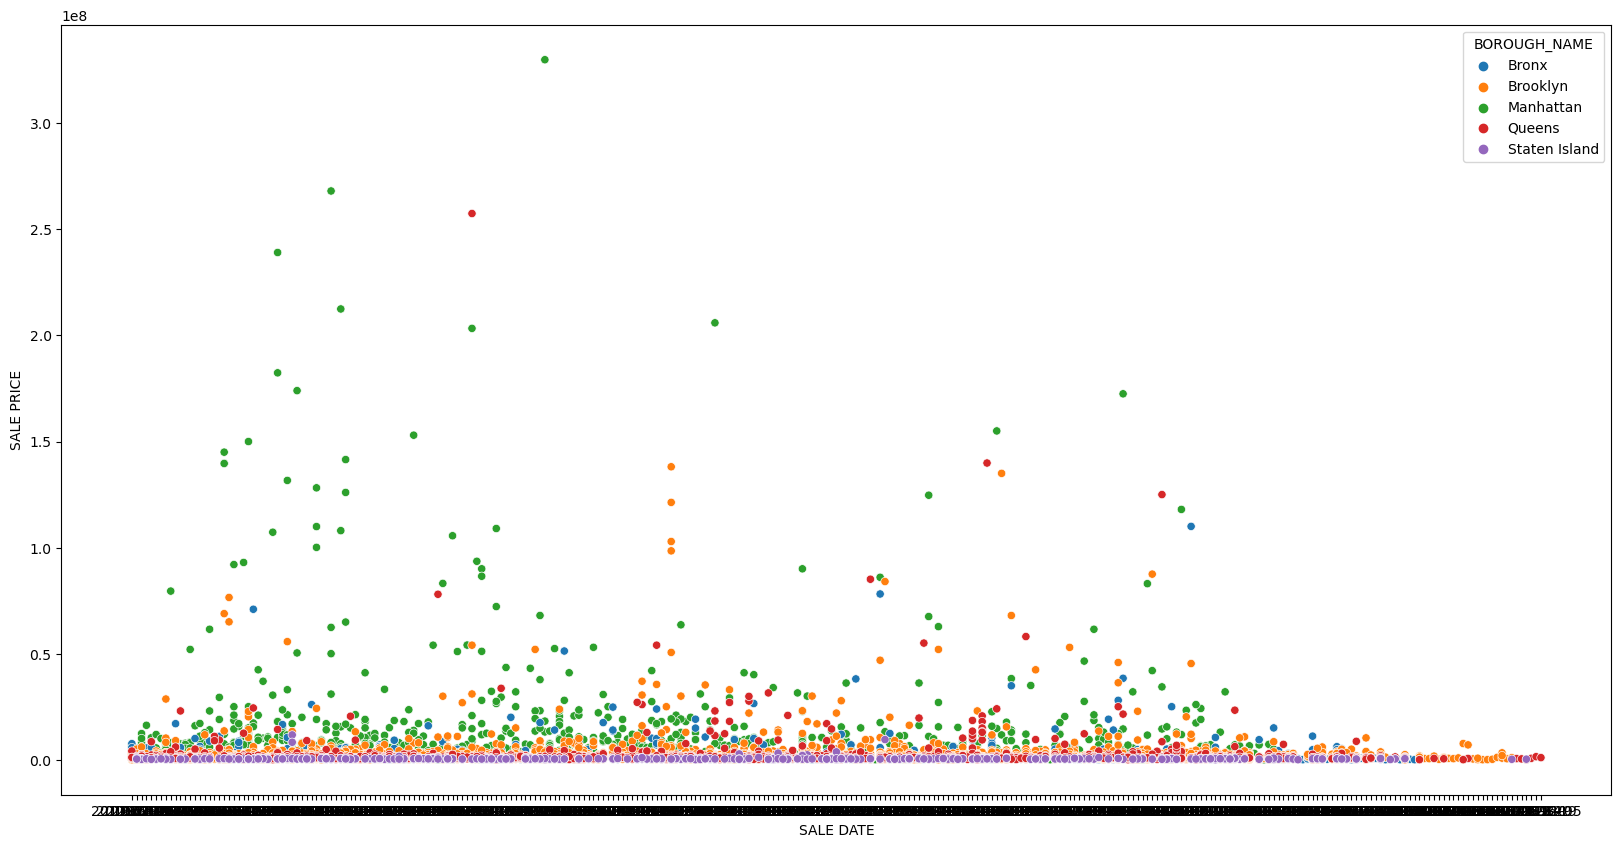

In [12]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=df_housing, x="SALE DATE", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=hue_order)

<AxesSubplot:xlabel='SALE_MONTH', ylabel='SALE PRICE'>

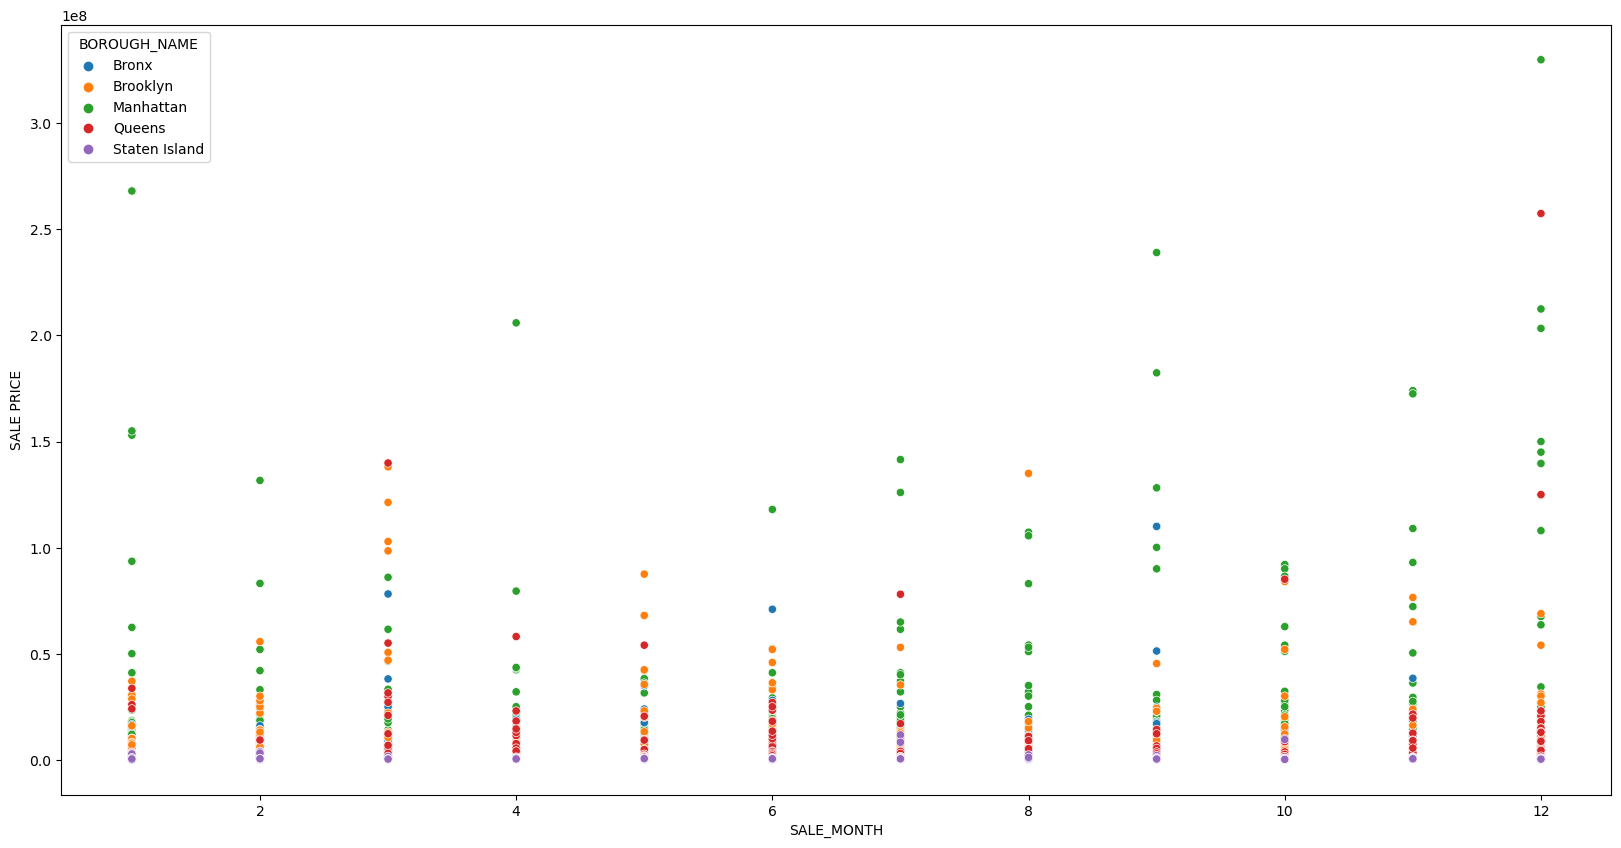

In [13]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=df_housing, x="SALE_MONTH", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=hue_order)

<AxesSubplot:xlabel='SALE PRICE', ylabel='Count'>

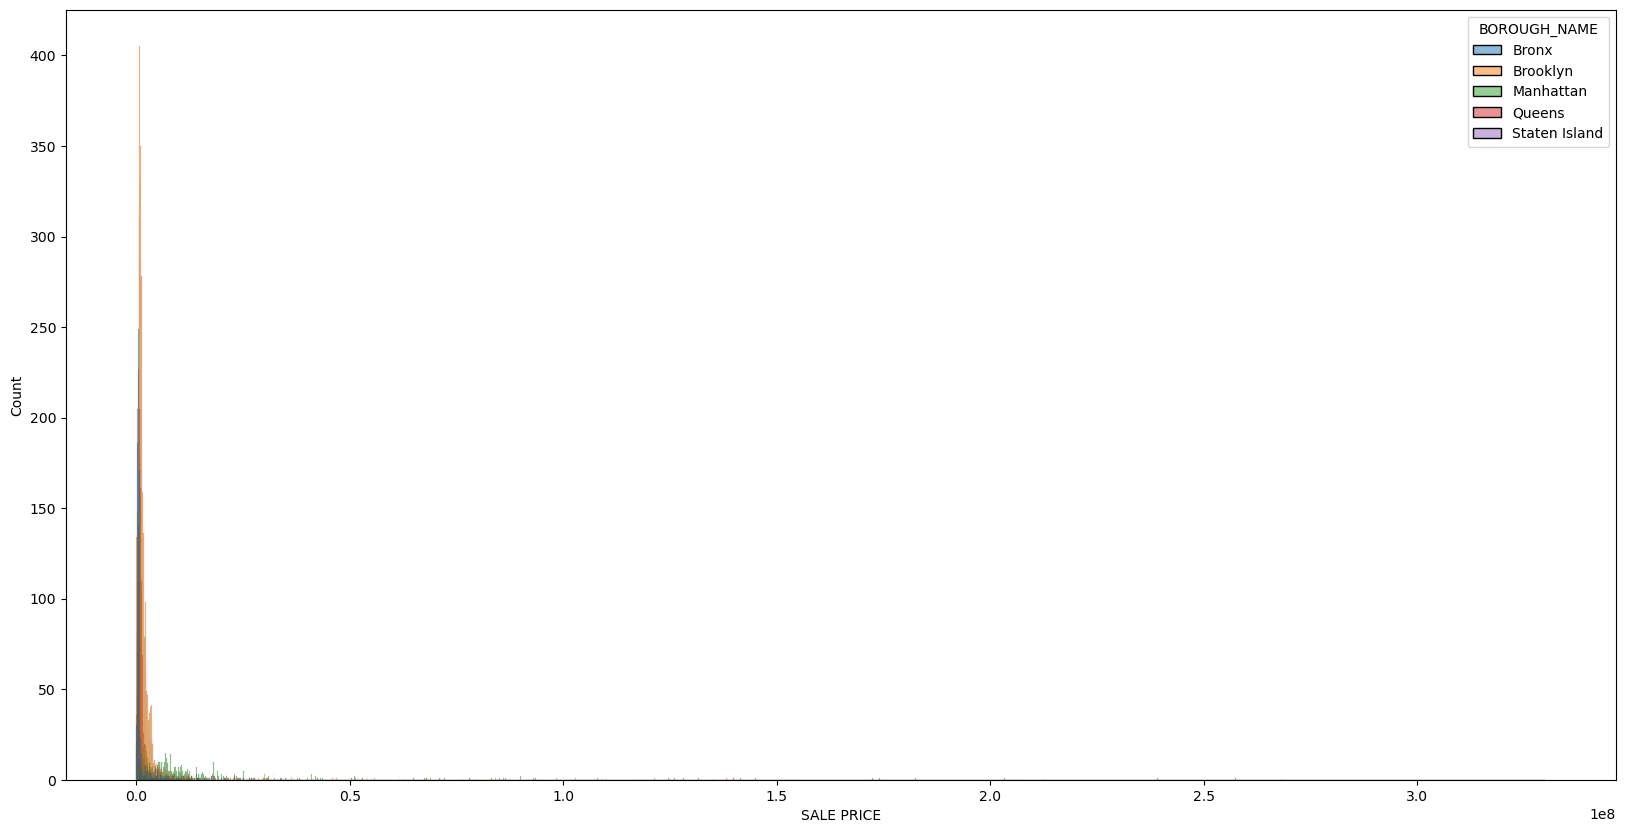

In [14]:
plt.figure(figsize = (20,10))
sns.histplot(data=df_housing, x="SALE PRICE", hue="BOROUGH_NAME", hue_order=hue_order)

It is hard to see the distribution of Sales Prices because of the effect of the outliers
on the scaling of the chart.
Here the exercise is repeated with the outliers removed.

<AxesSubplot:xlabel='SALE PRICE', ylabel='Count'>

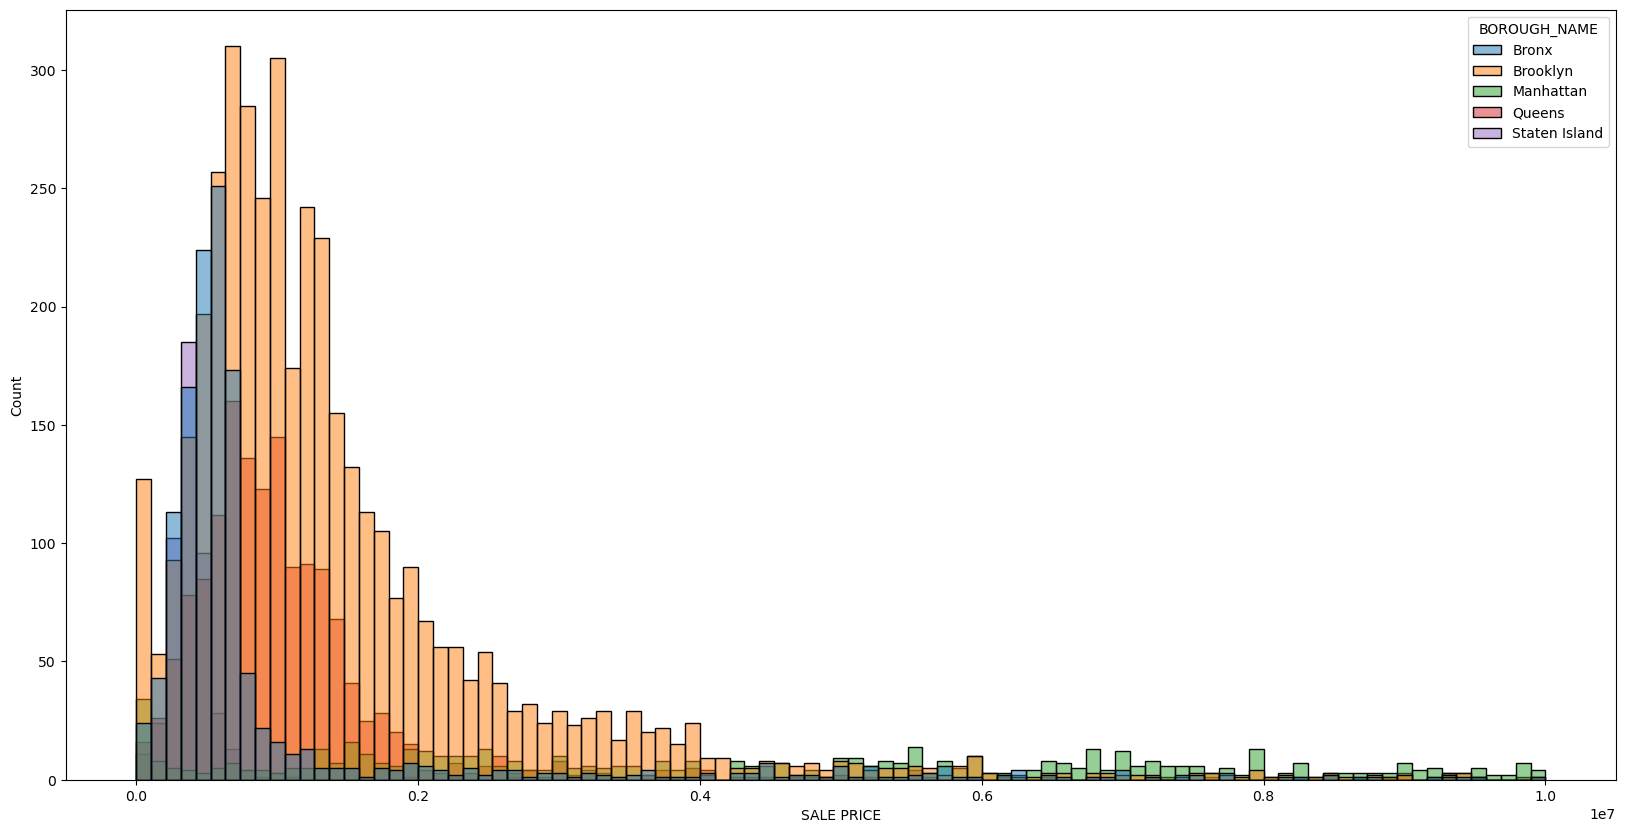

In [15]:
df_new_housing = df_housing[df_housing["SALE PRICE"] < 10000000]
plt.figure(figsize = (20,10))
sns.histplot(data=df_new_housing, x="SALE PRICE", hue="BOROUGH_NAME", hue_order=hue_order)


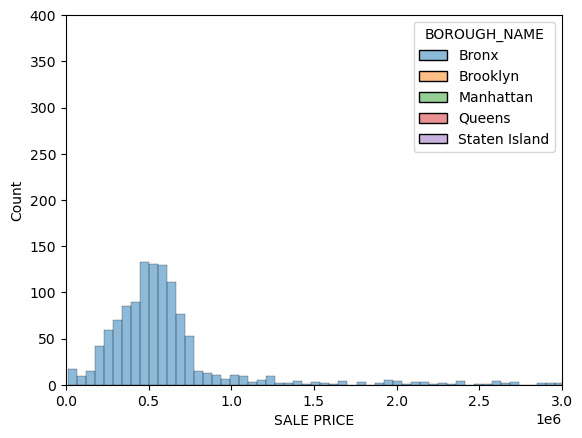

<Figure size 2000x1000 with 0 Axes>

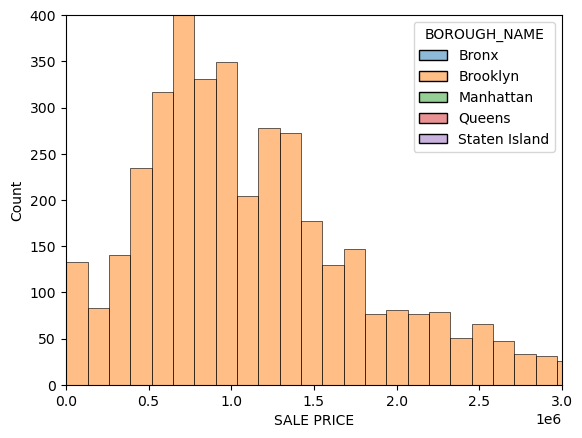

<Figure size 2000x1000 with 0 Axes>

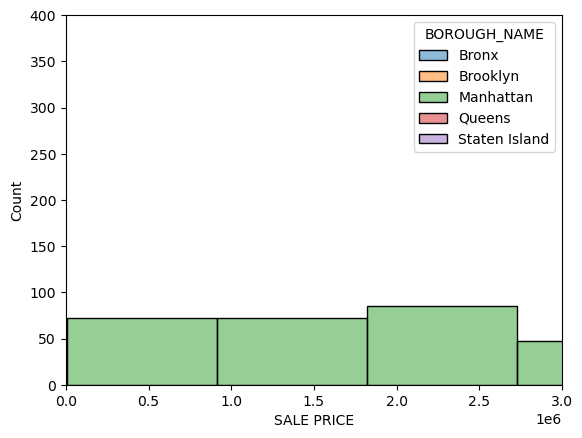

<Figure size 2000x1000 with 0 Axes>

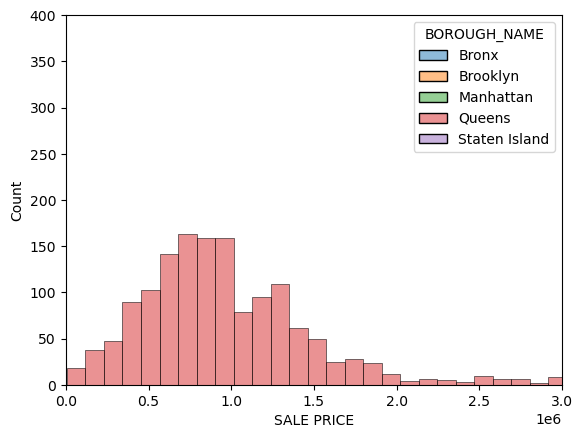

<Figure size 2000x1000 with 0 Axes>

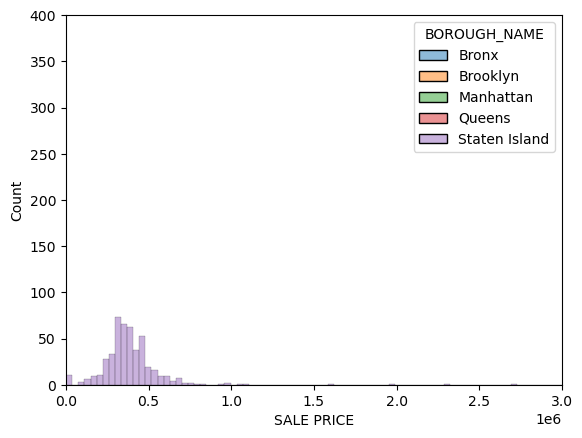

<Figure size 2000x1000 with 0 Axes>

In [18]:

for name in hue_order:
    fig, ax = plt.subplots()
    df_borough_housing = df_new_housing[df_new_housing["BOROUGH_NAME"] == name]
    plt.figure(figsize = (20,10))
    sns.histplot(data=df_borough_housing, x="SALE PRICE", hue="BOROUGH_NAME", hue_order=hue_order, ax=ax)
    ax.set_xlim(0,3000000)
    ax.set_ylim(0,400)

Check for correlation between TAX CLASS AT TIME OF SALE and BOROUGH_NAME

<AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE', ylabel='count'>

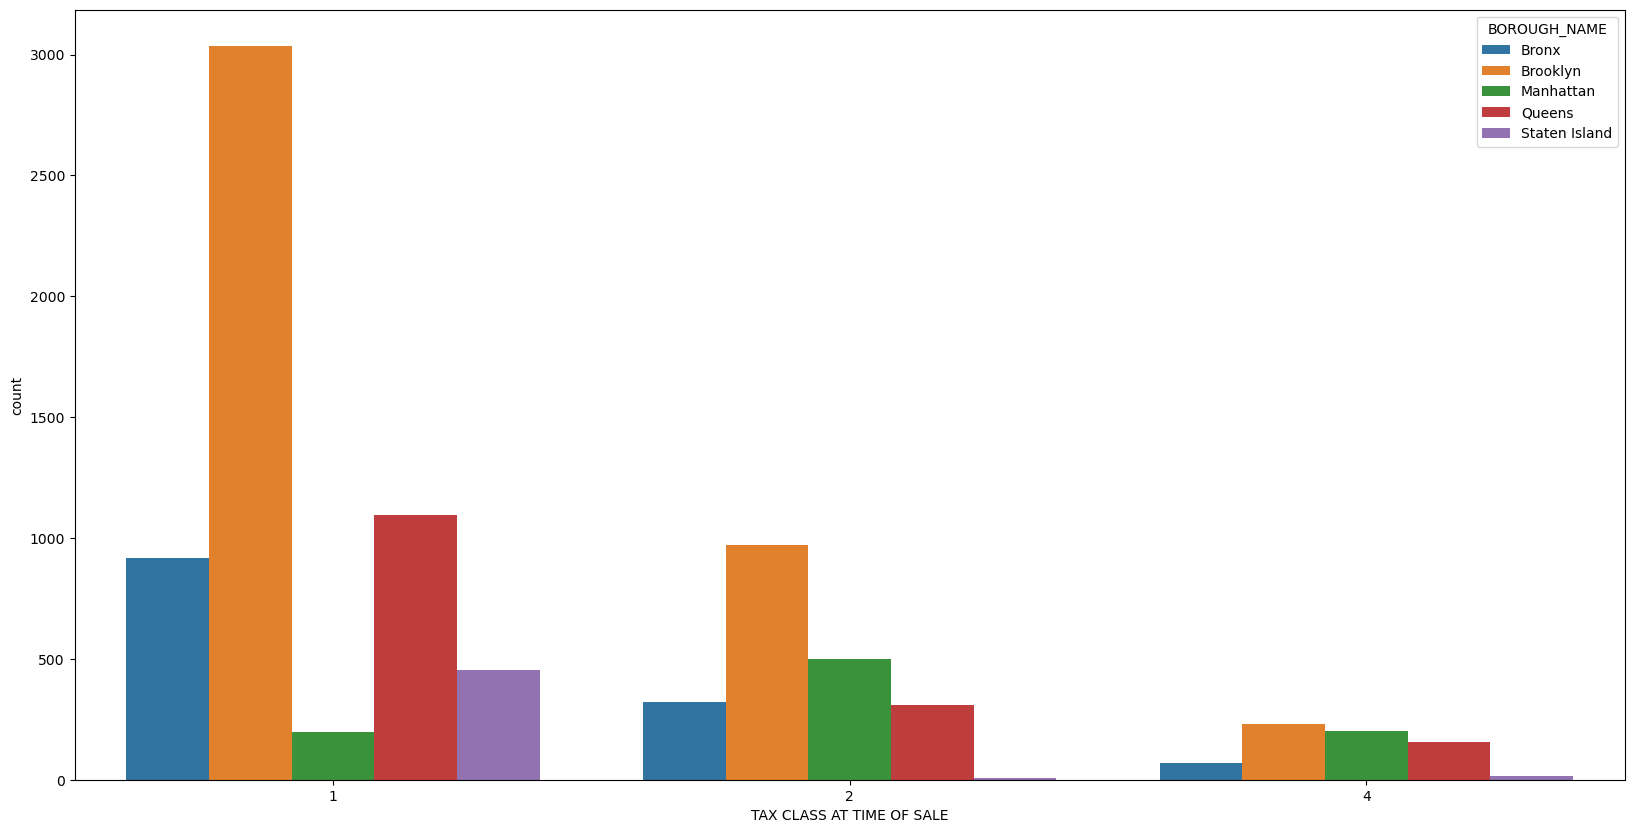

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(data=df_housing, x="TAX CLASS AT TIME OF SALE", hue="BOROUGH_NAME", hue_order=hue_order)

<AxesSubplot:xlabel='BLOCK', ylabel='SALE PRICE'>

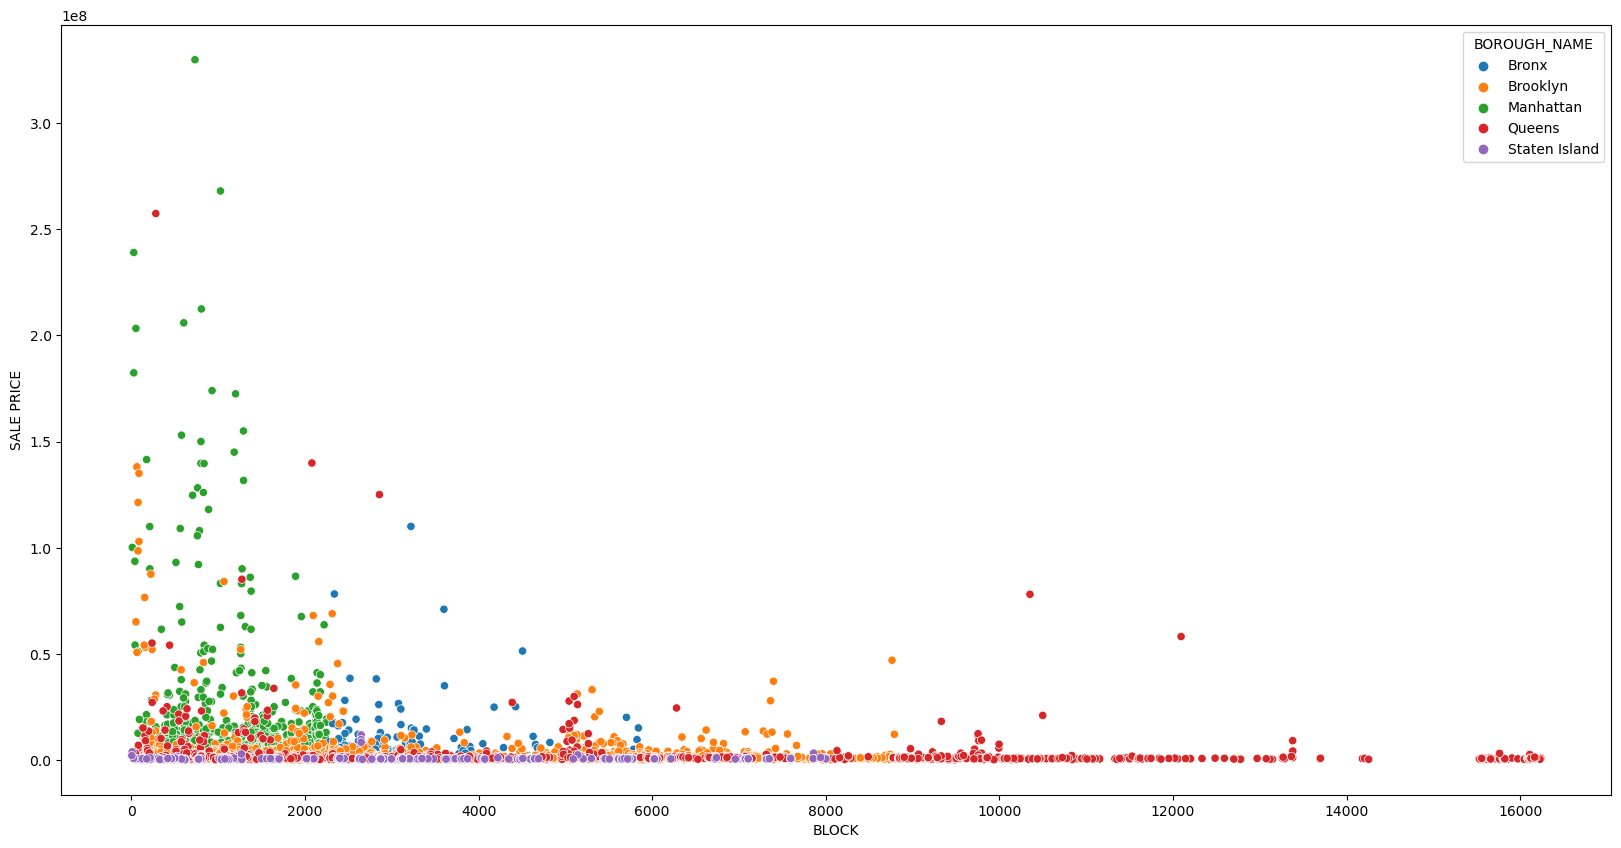

In [ ]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=df_housing, x="BLOCK", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=hue_order)